 구현 내용
========================================
--------------------------------------------------------------------------------------------------------------
+ Mean  


+ Mean Substraction : Dataset 평균을 0, 각 Data에 대해 Mean만큼 왼쪽으로 shift  


+ Variance(분산) & Standarad Deviation(표준 편차)  
    - 분산 = 제곱의 평균 - 평균의 제곱 = 편차 제곱의 평균  
        * 편차 제곱의 평균으로 구하는 쪽을 추천, std 구할 때 음수에 대한 루트 발생을 방지
    - 표준편차 = (분산)^0.5  
 
###  학습 효율 및 Overfitting 방지를 위한 데이터 전처리 -> Normalization / Standardization

+ Standardization ( 표준화 )
     - Mean Substraction 이후 분산을 1으로 만들어줌 : (dataset - mean ) / deviation
        
+ Normalization ( 정규화 )                
     - dataset을 0~1 사이의 값으로 scaling  
         * Ex) MIN-MAX : (data - min) / (max - min)


### Distance Function

+ Euclidean Distance (L2 Norm, 유클리드 공간)

+ Manhatton Distance (L1 Norm, 직각 이동 거리)            

+ Mahalanobis distance ( 데이터 분포를 고려 )  
  각 Feature가 가지고 있는 가중치를 고려한 거리, 데이터 분포를 고려한 거리, 상관관계가 있는 두 변수간의 거리  
  => **Covariance Matrix**  사용 ( 공분산의 절댓값이 클수록 뚜렷한 상관 관계를 가진다. )

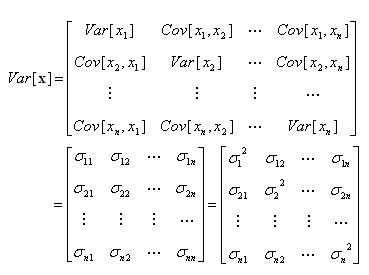

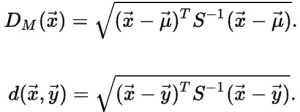
### Loss Function
  
+ Mean Squared Error (MSE) : ((prediction - label)**2) / n


+ Histogram                          


+ One-Hot Encoding


+ Transepose Mat ( 전치 행렬)

In [1]:
import numpy as np

# Hadamard Product  : 같은 크기의 두 행렬, 각 성분을 곱하는 연산
v1 = [1, 2, 3, 4, 5]
v2 = [10, 20, 30, 40, 50]
v3 = list()

for dim_idx in range(len(v1)):
    element_product = v1[dim_idx]*v2[dim_idx]
    v3.append(element_product)
print(v3)

v1 = np.array(v1);
v2 = np.array(v2);
v3 = v1 * v2
print(v3)

[10, 40, 90, 160, 250]
[ 10  40  90 160 250]


In [2]:
# L2 Norm
v1 = np.array([1,2,3,4,5,6,7,8,8])
norm = np.sum(v1**2)**0.5

print("v1          : ",v1)
print("v1 Norm     : ",norm)

v1          :  [1 2 3 4 5 6 7 8 8]
v1 Norm     :  16.3707055437449


In [3]:
# Unit Vector  =  Vector / L2 Norm
# numpy
Unit_vector = v1/norm
Unit_norm = np.sum(Unit_vector**2)**0.5
print("v1 Unit Vector : ", np.round(Unit_vector,3))
print("v1 Unit Vector Norm: ", np.round(Unit_norm,3))

v1 Unit Vector :  [0.061 0.122 0.183 0.244 0.305 0.367 0.428 0.489 0.489]
v1 Unit Vector Norm:  1.0


In [4]:
# Dot product
v1, v2 = np.array([1,2,3,4,5]), np.array([3,4,5,6,7])

print(np.sum(v1*v2))

85


In [5]:
# Euclidean distance
print(np.sum((np.array(v1)-np.array(v2))**2)**0.5)

4.47213595499958


In [6]:
# Manhattan distance
v1 = np.array([1, 3, 5, 2, 1, 5, 2])
v2 = np.array([2, 3, 1, 5, 2, 1, 3])

print(np.sum(np.abs (v1 - v2)))

14


In [7]:
# Mahalanobis distance

# 1. Covariance Matrix
#                   [ x ,  y  ,  z,  w]
dataset = np.array([[170, 50.5, 29, 80], 
                    [172, 71.1, 33, 93],  
                    [167, 61.3, 37, 72], 
                    [180, 88.4, 44, 88], 
                    [188, 69.8, 46, 85], 
                    [162, 58.2, 35, 69]]).T  ## Transpose
cov_mat1 = np.round(np.cov(dataset))
print('Covariance Matrix Shape:   ', cov_mat1.shape)

vec_mean =np.mean(dataset, axis =1)
print('[x, y, z, w] mean:         ', np.round(vec_mean))
cov_mat2 = np.zeros((len(dataset), len(dataset)))

for i in range(len(dataset)):
    for j in range(len(dataset)):
        cov_mat2[i][j] = np.mean((dataset[i] - vec_mean[i])*(dataset[j] - vec_mean[j]))

print('Covariance Matrix With numpy: \n', np.round(cov_mat2))
print('Covarinace Matrix With only Python: \n', np.round(cov_mat1))

Covariance Matrix Shape:    (4, 4)
[x, y, z, w] mean:          [173.  67.  37.  81.]
Covariance Matrix With numpy: 
 [[ 73.  61.  39.  48.]
 [ 61. 144.  52.  64.]
 [ 39.  52.  36.  11.]
 [ 48.  64.  11.  72.]]
Covarinace Matrix With only Python: 
 [[ 88.  74.  47.  57.]
 [ 74. 173.  62.  77.]
 [ 47.  62.  43.  14.]
 [ 57.  77.  14.  87.]]


In [8]:
Mdistances = np.zeros((len(dataset[0]),len(dataset[0])))

for i in range(len(Mdistances)):
    for j in range(len(Mdistances)):
        Mdistances[i][j] = np.sqrt( (dataset.T[i]-dataset.T[j]) @ np.linalg.inv(cov_mat2) @ (dataset.T[i]-dataset.T[j]).T )
                                        # (1 ,4)                       (4,4)                   (4,1)
print(np.round(Mdistances,3))  

[[0.    3.449 2.768 3.464 3.463 3.208]
 [3.449 0.    2.984 3.443 3.442 3.056]
 [2.768 2.984 0.    2.724 2.717 0.714]
 [3.464 3.443 2.724 0.    3.464 3.231]
 [3.463 3.442 2.717 3.464 0.    3.234]
 [3.208 3.056 0.714 3.231 3.234 0.   ]]


In [9]:
# MSE: Mean Squared Error
predictions = np.array([10, 20, 30])
labels = np.array([10, 25, 40])

print(np.mean((predictions - labels)**2))

41.666666666666664


In [10]:
# 빈도
numbers = [0, 2, 4, 2, 1, 4, 3, 1, 2, 3, 4, 1, 2, 3, 4]
number_cnt = [0,0,0,0,0]

for dim_idx in numbers:     # len(data)만큼 반복
    number_cnt[dim_idx]+=1
print(number_cnt)

number_cnt = [0,0,0,0,0]
numbers = np.array(numbers)
for dim_idx in range(len(number_cnt)): # len(class)만큼 반복
    number_cnt[dim_idx]= len(numbers[numbers==dim_idx]) # boolean indexing
print(number_cnt)

[1, 3, 4, 3, 4]
[1, 3, 4, 3, 4]


In [11]:
# dataset의 min max값을 모르는 경우 
# -> data중 하나의 값으로 초기값을 설정 or 나타낼 수 있는 수 표현 범위 MIN MAX
scores = [120, 130, 150, 180]

M, m = None, None
for score in scores:
    if M==None or score > M:  # 첫번째 수행시 score > M은 수행하지 않고 바로 내용을 수행
        M = score
    if m==None or score < m:
        m = score

print(M, m)
print(np.max(np.array(scores)), np.min(np.array(scores)))

180 120
180 120


In [12]:
# Histogram
scores=[50, 20, 30, 40, 10, 50, 70, 80, 90, 20, 30]
cutoffs = [0, 20, 40, 60, 80]
histogram = [0, 0 ,0 ,0, 0]

for score in scores:
    if score >= cutoffs[4]:
        histogram[4] +=1 
    elif score >= cutoffs[3]:
        histogram[3] +=1
    elif score >= cutoffs[2]:
        histogram[2] +=1
    elif score >= cutoffs[1]:
        histogram[1] +=1
    elif score >= cutoffs[0]:
        histogram[0] +=1
    else:
        pass
print(histogram)

print(np.histogram(scores, bins=[0, 20, 40, 60, 80,100]))

[1, 4, 3, 1, 2]
(array([1, 4, 3, 1, 2], dtype=int64), array([  0,  20,  40,  60,  80, 100]))


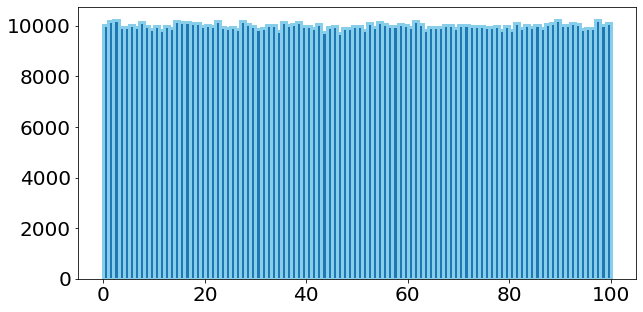

In [3]:
# Histogram
import numpy as np

# generate random data from randint -> Uniform Distribution
scores = np.random.randint(0, 100, size=(1000000))

# Histogram
n_bin = 100
hist_range = [0, 100]
interval = (hist_range[1] - hist_range[0])/n_bin

cutoffs = [interval * i for i in range(n_bin)]
hist = np.zeros(n_bin)
            
score_idx = scores // interval
for i in range(n_bin):
    hist[i]=len(score_idx[score_idx == i])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(cutoffs, hist, width=interval, edgecolor='skyblue', linewidth=3, align='edge')
ax.tick_params(labelsize=20)

In [13]:
# Normalization, Standardization

# Standardization: 평균이 0 분산이 1인 dataset으로 만들어줌
scores = np.array([120, 130, 150, 180])
print('mean(before): ', np.mean(scores))
scores = ( scores - np.mean(scores) ) / np.std(scores)
print('mean(after): ', np.mean(scores))
print(scores)


print()
# Normalization 정규화 Ex) Min-Max Normalization (0 ~ 1사이의 값으로 scaling)
scores = np.array([120, 130, 150, 180])
Normalized_score = (scores-np.min(scores))/(np.max(scores)-np.min(scores))
print(Normalized_score)

mean(before):  145.0
mean(after):  -5.551115123125783e-17
[-1.09108945 -0.65465367  0.21821789  1.52752523]

[0.         0.16666667 0.5        1.        ]


In [14]:
# Numpy Axis
scores = np.array([[10 , 15, 20], [20, 25, 30], [30, 35, 40], [40, 45, 50]])
print('shape : ', scores.shape)
print('dim   : ', scores.ndim) # 2 
# axis 0 or 1 선택 가능, 지정하지 않으면 None(모든 데이터를 1차원으로 나열해서 계산)
print(np.sum(scores))
print('===========axis0===============')
axis0 = np.sum(scores, axis = 0)
print('shape : ', axis0.shape)
print(axis0) # row 기준 합        # 0 : 제일 고차원, 행 축을 없앤다.
print('===========axis1===============')
axis1 = np.sum(scores, axis = 1)
print('shape : ', axis1.shape)  # 1 : 두번째 차원, 열 축을 없앤다.
print(axis1) # col 기준 합 
print()
print('===========Extend to Tensor===============')
scores = np.round(np.random.randn(4,3,6)*20)
print('shape : ', scores.shape)
print('dim   : ', scores.ndim) 
print(scores)
print('===========axis0===============')
axis0 = np.sum(scores, axis = 0)
print('shape : ', axis0.shape)
print(axis0) # Mat 기준 합         # 0 : 제일 고차원, Matrix 차원을 없앤다.
print('===========axis1===============')
axis1 = np.sum(scores, axis = 1) # 1 : 두번째 차원, 행 차원을 없앤다.
print('shape : ', axis1.shape)
print(axis1) # row 기준 합
print('===========axis2===============')
axis2 = np.sum(scores, axis = 2) # 1 : 세번째 차원, 열 차원을 없앤다.
print('shape : ', axis2.shape)
print(axis2) # col 기준 합

shape :  (4, 3)
dim   :  2
360
===========axis0===============
shape :  (3,)
[100 120 140]
===========axis1===============
shape :  (4,)
[ 45  75 105 135]

===========Extend to Tensor===============
shape :  (4, 3, 6)
dim   :  3
[[[ 13.  -7.  12.  10. -17. -21.]
  [ 13.  -1. -39. -13. -14.  -9.]
  [ -1.  -2.  -5.   5.   5. -16.]]

 [[-22. -16. -19.   5. -19. -13.]
  [-18.   6. -10. -11.   6.   5.]
  [ 19. -10.  -2.  17.  31.  22.]]

 [[ -0. -24.  12.   7.  28.  42.]
  [  2. -20.  42.  35.  26.  -5.]
  [-26.  20.   1.   9.  32. -27.]]

 [[ -3.  -4.   2.   7.   9. -11.]
  [-26.  11.  -3.  30.  15.  13.]
  [ -7.  -7. -15.   4. -18. -22.]]]
===========axis0===============
shape :  (3, 6)
[[-12. -51.   7.  29.   1.  -3.]
 [-29.  -4. -10.  41.  33.   4.]
 [-15.   1. -21.  35.  50. -43.]]
===========axis1===============
shape :  (4, 6)
[[ 25. -10. -32.   2. -26. -46.]
 [-21. -20. -31.  11.  18.  14.]
 [-24. -24.  55.  51.  86.  10.]
 [-36.   0. -16.  41.   6. -20.]]
===========axis2==========

In [15]:
# 과목별 mean, Variance, Standard deviation
scores = np.array([[10, 15, 20], [20, 25, 30], [30, 35, 40], [40, 45, 50]])

n_class = len(scores[0])
n_student = len(scores)

class_score_sums = np.zeros([n_class])
class_score_means  = np.zeros([n_class])
class_score_square_sums  = np.zeros([n_class])
class_score_variance  = np.zeros([n_class])
class_score_stds  = np.zeros([n_class])

class_score_sums = np.sum(scores, axis=0)
class_score_square_sums = np.sum(scores**2, axis=0) 
class_score_means = np.mean(scores, axis = 0)
class_score_variance = np.var(scores, axis=0)
class_score_stds = np.std(scores, axis= 0)
    
print(class_score_sums)
print(class_score_means)
print(class_score_variance)
print(class_score_stds)

[100 120 140]
[25. 30. 35.]
[125. 125. 125.]
[11.18033989 11.18033989 11.18033989]


In [16]:
# standardization (score-mean) / std
student_scores = (scores - class_score_means) / class_score_stds
print(student_scores)

[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]


In [17]:
n_class = len(student_scores[0])
n_student = len(student_scores)

class_score_sums = np.zeros([n_class])
class_score_means  = np.zeros([n_class])
class_score_square_sums  = np.zeros([n_class])
class_score_variance  = np.zeros([n_class])
class_score_stds  = np.zeros([n_class])

class_score_sums = np.sum(student_scores, axis=0)
class_score_square_sums = np.sum(student_scores**2, axis=0) 
class_score_means = np.mean(student_scores, axis = 0)
class_score_variance = np.var(student_scores, axis=0)
class_score_stds = np.std(student_scores, axis= 0)
    
print(class_score_sums)
print(class_score_means)
print(class_score_variance)
print(class_score_stds)

[0. 0. 0.]
[0. 0. 0.]
[1. 1. 1.]
[1. 1. 1.]


In [18]:
# one-hot encoding
predictions = np.array([ [1, 0, 0, 0],
                         [0, 0, 1, 0],
                         [0, 0, 1, 0],
                         [1, 0, 0, 0],
                         [1, 0, 0, 0],
                         [0, 0, 0, 1] ])
labels = np.array([0, 1, 2, 1, 0 , 3])

n_pred = len(predictions)                   # dataSet 개수
n_class = len(predictions[0])               # Class 개수

one_hot_mat = np.zeros([n_pred,n_class])
print(one_hot_mat)
for i in range(len(labels)):
    one_hot_mat[i][labels[i]]=1
print(one_hot_mat)

#Accuracy
accuracy = 0
for pred_idx in range(n_pred):
    prediction = predictions[pred_idx]
    label = one_hot_mat[pred_idx]
    if(prediction[prediction==1] == label[prediction==1]):
        accuracy +=1

accuracy /= n_pred 
print(accuracy)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
0.6666666666666666


In [19]:
# Transpose matrix : 전치 행렬
mat = [[1,2,3],
       [4,5,6],
       [7,8,9]]
n_row = len(mat)
n_col = len(mat[0])

t_mat = list()
for col_idx in range(n_col):
    column = list()
    for row_idx in range(n_row):
        column.append(mat[row_idx][col_idx])
    t_mat.append(column)
    
print(np.array(t_mat))
print(np.array(mat).T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]
[[1 4 7]
 [2 5 8]
 [3 6 9]]
